# Assignment 1

## problem statement 2
Data Processing and Visualization: Given a dataset containing information about students' test scores, fetch the data from an API, calculate the average score, and create a bar chart to visualize the data.

In [20]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [21]:
# Data from Kaggle: no suitable API found.
import kagglehub
path = kagglehub.dataset_download("whenamancodes/students-performance-in-exams")

In [22]:
path

'C:\\Users\\Ahmed\\.cache\\kagglehub\\datasets\\whenamancodes\\students-performance-in-exams\\versions\\1'

In [23]:
import pandas as pd
import os

# Load the dataset from the specified path
df = pd.read_csv(f'{path}/exams.csv')


display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [24]:
# Calculate average score for each student across math, reading, and writing
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Calculate average scores grouped by gender
avg_scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score', 'average score']].mean()

# Calculate average scores grouped by race/ethnicity
avg_scores_by_race = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score', 'average score']].mean()

print("Average scores by gender:")
display(avg_scores_by_gender)

print("\nAverage scores by race/ethnicity:")
display(avg_scores_by_race)

Average scores by gender:


,math score,reading score,writing score,average score
gender,,,,
female,63.196687,71.888199,71.708075,68.930987
male,69.384913,66.305609,64.029014,66.573179



Average scores by race/ethnicity:


,math score,reading score,writing score,average score
race/ethnicity,,,,
group A,65.215190,68.556962,66.974684,66.915612
group B,63.170732,67.102439,65.736585,65.336585
group C,63.130031,66.383901,64.523220,64.679051
group D,69.267176,72.087786,72.259542,71.204835
group E,74.465649,72.526718,70.213740,72.402036


In [25]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reshape the DataFrame for plotting (long format)
avg_scores_melted = avg_scores_by_gender.reset_index().melt(id_vars='gender',
                                                            var_name='score_type',
                                                            value_name='average_score_value')

print("Melted DataFrame for average scores by gender:")
display(avg_scores_melted.head())

Melted DataFrame for average scores by gender:


,gender,score_type,average_score_value
0,female,math score,63.196687
1,male,math score,69.384913
2,female,reading score,71.888199
3,male,reading score,66.305609
4,female,writing score,71.708075


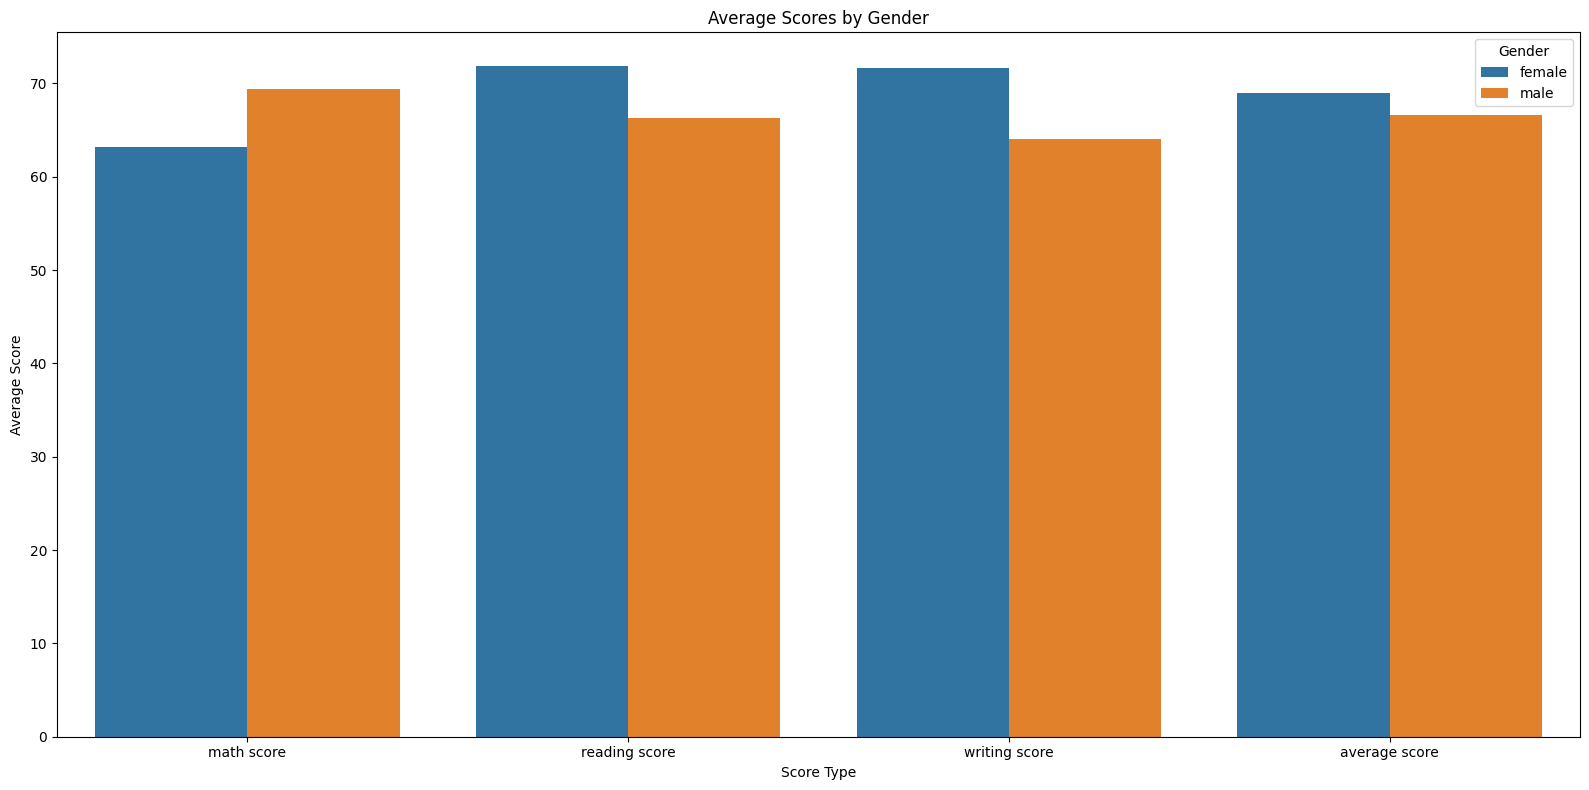

In [27]:
plt.figure(figsize=(16, 8))

sns.barplot(x='score_type', y='average_score_value', hue='gender', data=avg_scores_melted)
plt.title('Average Scores by Gender')
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()